## Basic settings

In [7]:
import tqdm 
import numpy as np
from matplotlib import pyplot as plt

# Define experiment constants
N = 1000 # number of people
p_luck = 0.5 # percentage of lucky/unlucy events
town_size = 201*201
starting_capital = 10

N_E = int(N/2) # number of lucky/unlucky events
N_luck = int(N_E*p_luck) # number of lucky events

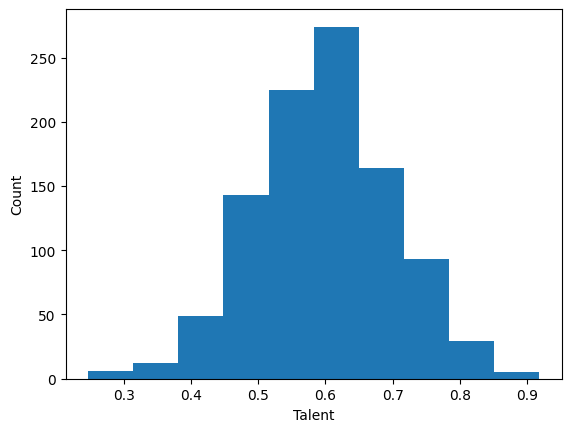

In [8]:
# define talents
talents = np.random.normal(0.6, 0.1, N) # mean: 0.6 standard deviation:0.1
talents[talents>0.99] = 0.99
talents[talents<0.01] = 0.01
plt.hist(talents)
plt.xlabel('Talent')
plt.ylabel('Count')
plt.show()
# try: if the talent affect the experiment:
# p_luck1 = talents
# N_luck1 = int(N_E*p_luck)

## Experiments

In [9]:
n_simulation = 10
n_iteration = 80 # 20-60 yrs, 2/every year

capitals = np.ones(N) * starting_capital
positions = np.random.choice(town_size, N , replace=False)

def move_events(events, town_size=201, step_size = 1):
    events += np.random.choice([-step_size, step_size], events.shape[0])
    events[events<0] += town_size
    events[events>town_size] -= town_size
    return events

In [10]:
history = np.zeros((N, 5))
history[:, 0] = positions
history[:, 4] = talents
# selects all rows in the first (0th) column of the history array.

the richest person:  [4209.        9.        2.     1280.        0.6742]
Total amount of the capitals:  15004.667968843132
Top 10 richest people own 31.990 percents of total capital in the town


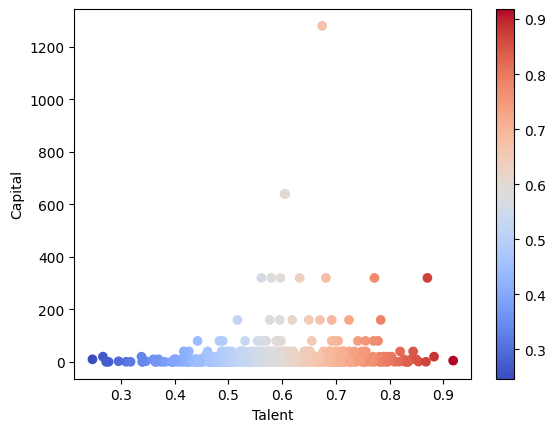

In [11]:
# Scenario 1: Different talents

simulated_capitals = capitals.copy()

for n in range(n_simulation):
    #tqdm.tqdm(range(n_simulation), total = n_simulation):
    events = np.random.choice(town_size, N_E, replace=False)
    lucky_events, unlucky_events = events[:N_luck], events[N_luck:]

    for iteration in range(n_iteration):
        lucky_events, unlucky_events = move_events(lucky_events), move_events(unlucky_events)
        met_unluck = np.in1d(positions, unlucky_events)
        seized_luck = np.logical_and(np.in1d(positions, lucky_events), talents > np.random.random(N))
        simulated_capitals[met_unluck] /= 2.0
        simulated_capitals[seized_luck] *= 2.0
        # history[:, 1] += seized_luck.astype(int)
        history[:, 1] += np.in1d(positions, lucky_events)
        history[:, 2] += met_unluck.astype(int)
        
        
history[:, 3] = simulated_capitals
    
sorted_capitals = sorted(list(simulated_capitals))


max_index = np.argmax(history[:, 3])
row_with_max = history[max_index]
print('the richest person: ', row_with_max)

np.set_printoptions(suppress=True, precision=4)
fmt = '%d, %d, %d, %.2f, %.4f'
np.savetxt('sample.csv', history, fmt=fmt, delimiter=',', header='Position,Seized Luck,'+\
           'Met Unluck,Simulated Capital,Talent')

print('Total amount of the capitals: ',sum(sorted_capitals))
print ('Top 10 richest people own %.3f percents of total capital in the town'\
    % (100*sum(sorted_capitals[-10:])/sum(sorted_capitals)))

plt.scatter(talents, history[:, 3], c=talents, cmap = 'coolwarm')
plt.xlabel('Talent')
plt.ylabel('Capital')
plt.colorbar()
plt.show()

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('sample.csv')
x = data['Talent']
y = data['Seized Luck']
z = data['Met Unluck']
n = data['Simulated Capital']
model = LinearRegression()
X = np.column_stack((x, y, z))
model.fit(X, n)
a, b, c = model.coef_
e = model.intercept_
# linear relationship as ax + by + cz + e = n
print(f"Linear Equation: {a}x + {b}y + {c}z + {e} = n")

b = b*(sum(history[:, 1])/1000)/(sum(history[:, 4])/1000)

print(a, b, a/b)


Linear Equation: 41.08167502501167x + 3.31230272780158y + -3.4471451703041778z + -8.721362374539982 = n
41.08167502501167 25.83753734517337 1.5899996379757921
